In [1]:
#Optimizer Gradient Decent RMS Prop Adam Option

In [30]:
# !python -m pip install --upgrade pip

In [ ]:
# padding: to make sure we dont lose daya #Learn about training accuracy and testing accuracy

In [16]:
import keras
import tensorflow
import flask
import PIL


In [17]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [18]:
from keras.preprocessing.image import ImageDataGenerator

In [19]:
img_gen=ImageDataGenerator(rescale=1/255)

In [20]:
img_gen.flow_from_directory(r'''D:\DSAI-April\mnist_data\trainingSet''')
img_gen.flow_from_directory(r'''D:\DSAI-April\mnist_data\validatingSet''')

Found 37940 images belonging to 10 classes.
Found 4060 images belonging to 10 classes.


In [22]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout

In [23]:
from keras import optimizers

In [54]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(2,2),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(2,2),input_shape=(28,28,1),activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [55]:
model.compile(loss='categorical_crossentropy'
             ,optimizer='adam',metrics=['accuracy'])

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 64)        8256      
_________________________________________________________________
flatten_5 (Flatten)          (None, 43264)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               5537920   
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                650       
Total params: 5,555,242
Trainable params: 5,555,242
Non-trainable params: 0
_________________________________________________________________


In [57]:
input_shape=(28,28,1)

In [58]:
train_img_gen=img_gen.flow_from_directory(r'''D:\DSAI-April\mnist_data\trainingSet/''' 
                            ,target_size=input_shape[:2],batch_size=16,class_mode='categorical',
                           color_mode='grayscale')
validate_img_gen=img_gen.flow_from_directory(r'''D:\DSAI-April\mnist_data\validatingSet/''' 
                            ,target_size=input_shape[:2],batch_size=16,class_mode='categorical',
                           color_mode='grayscale')

Found 37940 images belonging to 10 classes.
Found 4060 images belonging to 10 classes.


In [59]:
train_img_gen.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [63]:
history=model.fit_generator(train_img_gen,
                            validation_data=validate_img_gen,
                   validation_steps=12, epochs=2,steps_per_epoch=100)

Epoch 1/2
100/100 [==============================] - 31s 311ms/step - loss: 0.2378 - acc: 0.9325 - val_loss: 0.2200 - val_acc: 0.9323
Epoch 2/2
100/100 [==============================] - 30s 304ms/step - loss: 0.1757 - acc: 0.9419 - val_loss: 0.2095 - val_acc: 0.9427


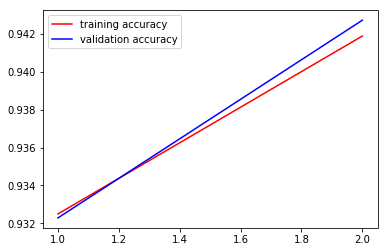

In [66]:
acc=history.history['acc']
val_acc=history.history['val_acc']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'red',label='training accuracy')
plt.plot(epochs,val_acc,'blue',label='validation accuracy')
plt.legend()
plt.figure()
plt.show()




In [67]:
model.save('new_model.h5')

In [77]:
import cv2

In [91]:
a=cv2.imread('../mnist_data/testSet/img_9.jpg',0 )
print(a.shape)

(28, 28)


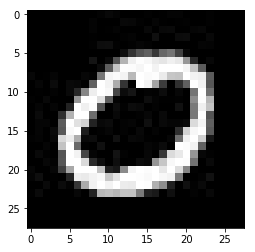

In [92]:
plt.imshow(a,cmap='gray')

In [101]:
model_json=model.to_json()
with open('model.json','w') as json_file:
    json_file.write(model_json)
    
model.save_weights("model.h5")    